In [1]:
import pandas as pd
import os

dv = "--------------------------"
directory = 'Scaled Data'
r_scaled_data = pd.read_csv(os.path.join(directory,"r_scaled_data.csv"))
r_scaled_data

,Product Height (cm),Product Length (cm),Product Weight (g),Product Width (cm),Freight Value,Price ($),Customer City,Customer State,Customer Zip Code Prefix
0,0.000000,2.25,-0.200000,-0.533333,-0.547124,-0.693170,-0.643467,-0.786190,-0.018197
1,-0.750000,-0.30,-0.342857,-0.600000,0.056304,-0.592253,-0.317155,0.878228,-0.147696
2,-0.750000,-0.30,-0.342857,-0.600000,0.589963,-0.592253,1.800319,2.544820,1.917058
3,-0.750000,-0.30,-0.342857,-0.600000,-1.046512,-0.592253,-0.604027,-0.786190,-1.015774
4,6.833333,-0.45,8.595429,0.866667,4.501836,1.131498,-0.658092,-0.786190,4.343956
...,...,...,...,...,...,...,...,...,...
38201,-0.750000,-0.45,-0.314286,-0.466667,0.232558,-0.438430,0.100539,0.000000,0.229317
38202,-0.750000,-0.45,-0.314286,-0.466667,-1.094247,-0.438430,-0.643467,-0.786190,-0.444501
38203,-0.750000,-0.45,-0.314286,-0.466667,-1.079559,-0.438430,-0.643467,-0.786190,-1.295343
38204,-0.750000,-0.45,-0.314286,-0.466667,-1.079559,-0.438430,-0.643467,-0.786190,-0.750238


### DATA SPLIT - Train, Validation & Split

In [2]:
#!pip install joblib==1.1.1
#!pip install --upgrade pandas-profiling
#!pip install scikit-learn

In [3]:
#Splitting and Dropping of Data & Columns for Machine Learning
from sklearn.model_selection import train_test_split

X = r_scaled_data.drop(columns = ['Freight Value'])
y = r_scaled_data['Freight Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

print(dv)
print(f'df_shape: \t {r_scaled_data.shape}')

print(dv)
print(f'X_train: \t {X_train.shape} \ny_train: \t {y_train.shape}')

print(dv)
print(f'X_test: \t {X_test.shape} \ny_test: \t {y_test.shape}')

--------------------------
df_shape: 	 (38206, 9)
--------------------------
X_train: 	 (28654, 8) 
y_train: 	 (28654,)
--------------------------
X_test: 	 (9552, 8) 
y_test: 	 (9552,)


In [4]:
validation_size = 0.15
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=10)

In [5]:
print(dv)
print(f'df_shape: \t {r_scaled_data.shape}')

print(dv)
print(f'X_validation: \t {X_validation.shape} \ny_validation: \t {y_validation.shape}')

print(dv)
print(f'X_train: \t {X_train.shape} \ny_train: \t {y_train.shape}')

print(dv)
print(f'X_test: \t {X_test.shape} \ny_test: \t {y_test.shape}')

--------------------------
df_shape: 	 (38206, 9)
--------------------------
X_validation: 	 (4299, 8) 
y_validation: 	 (4299,)
--------------------------
X_train: 	 (24355, 8) 
y_train: 	 (24355,)
--------------------------
X_test: 	 (9552, 8) 
y_test: 	 (9552,)


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


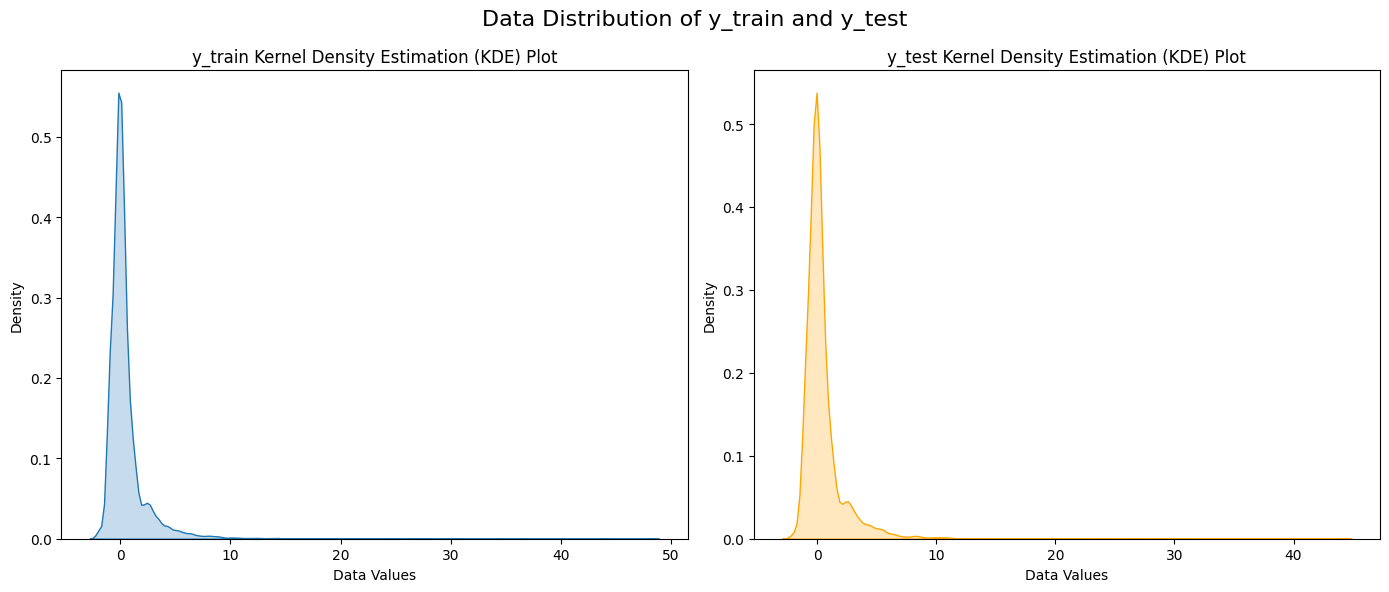

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.suptitle("Data Distribution of y_train and y_test", fontsize=16)

# Create KDE plot
plt.subplot(1, 2, 1)
sns.kdeplot(y_train, fill=True)
plt.title('y_train Kernel Density Estimation (KDE) Plot')
plt.xlabel('Data Values')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(y_test, fill=True, color='#FFA50080')
plt.title('y_test Kernel Density Estimation (KDE) Plot')
plt.xlabel('Data Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Cross Validation, Grid Search and Modeling

## CROSS VALIDATION

<table>
  <tr>
    <th colspan="2">Regression Models to Cross-Validate</th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>K-Nearest Neighbors Regression (KNN)</td>
  </tr>
  <tr>
    <td>Lasso Regression</td>
    <td>Decision Tree Regression</td>
  </tr>
  <tr>
    <td>Ridge Regression</td>
    <td>XGBoost Regression</td>
  </tr>
  <tr>
    <td>Gradient Boosting Regression</td>
    <td></td>
  </tr>
  <tr>
    <td>Random Forest Regression</td>
    <td></td>
  </tr>
  <tr>
    <td>Support Vector Regression (SVR)</td>
    <td></td>
  </tr>
</table>


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [8]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'SVR': SVR(),
    'XGBoost Regression': XGBRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

# Loop over each model
for name, model in models.items():
    # Perform cross-validation with different scoring options
    cv_scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores_explained_variance = cross_val_score(model, X_train, y_train, cv=5, scoring='explained_variance')
    
    # Calculate mean scores
    mean_mse = -cv_scores_mse.mean()
    mean_mae = -cv_scores_mae.mean()
    mean_r2 = cv_scores_r2.mean()
    mean_explained_variance = cv_scores_explained_variance.mean()
    
    # Print the mean scores for each model
    print(dv)
    print(f"Model: {name}")
    print(f"MSE Mean: {mean_mse:.2f}")
    print(f"MAE Mean: {mean_mae:.2f}")
    print(f"R2 Mean: {mean_r2:.2f}")
    print(f"Explained Variance Mean: {mean_explained_variance:.2f}\n")


--------------------------
Model: Linear Regression
MSE Mean: 1.36
MAE Mean: 0.64
R2 Mean: 0.65
Explained Variance Mean: 0.65

--------------------------
Model: Lasso Regression
MSE Mean: 2.14
MAE Mean: 0.79
R2 Mean: 0.45
Explained Variance Mean: 0.45

--------------------------
Model: Ridge Regression
MSE Mean: 1.36
MAE Mean: 0.64
R2 Mean: 0.65
Explained Variance Mean: 0.65

--------------------------
Model: KNN Regression
MSE Mean: 1.26
MAE Mean: 0.56
R2 Mean: 0.67
Explained Variance Mean: 0.67

--------------------------
Model: Decision Tree Regression
MSE Mean: 2.04
MAE Mean: 0.71
R2 Mean: 0.47
Explained Variance Mean: 0.47

--------------------------
Model: SVR
MSE Mean: 1.51
MAE Mean: 0.54
R2 Mean: 0.61
Explained Variance Mean: 0.61

--------------------------
Model: XGBoost Regression
MSE Mean: 1.17
MAE Mean: 0.54
R2 Mean: 0.70
Explained Variance Mean: 0.70

--------------------------
Model: Gradient Boosting Regression
MSE Mean: 1.15
MAE Mean: 0.56
R2 Mean: 0.70
Explained Varia

## HYPERPARAMETER TUNING

In [9]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# Initialize variables to keep track of the best score and corresponding parameters
best_score_xgb = 0
best_params_xgb = None
best_score_gb = 0
best_params_gb = None
best_score_rf = 0
best_params_rf = None

# Define the hyperparameter grids for each model
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

for n_estimators in param_grid_xgb['n_estimators']:
    for max_depth in param_grid_xgb['max_depth']:
        regr = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        regr.fit(X_train,y_train)
        score = regr.score(X_validation,y_validation)

        if score > best_score_xgb:
            best_score_xgb = score
            best_params_xgb = {'n_estimators':n_estimators, 'max_depth':max_depth}
print("""XGBoost Regression
Best Score: {:.2f}
Best Parameters: {}
""".format(best_score_xgb, best_params_xgb))
        
for n_estimators in param_grid_gb['n_estimators']:
    for max_depth in param_grid_gb['max_depth']:
        regr = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth)
        regr.fit(X_train,y_train)
        score = regr.score(X_validation,y_validation)

        if score > best_score_gb:
            best_score_gb = score
            best_params_gb = {'n_estimators':n_estimators, 'max_depth':max_depth}
print("""Gradient Boosting Regression
Best Score: {:.2f}
Best Parameters: {}
""".format(best_score_gb, best_params_gb))

for n_estimators in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        regr.fit(X_train,y_train)
        score = regr.score(X_validation,y_validation)

        if score > best_score_rf:
            best_score_rf = score
            best_params_rf = {'n_estimators':n_estimators, 'max_depth':max_depth}
print("""Random Forest Regression
Best Score: {:.2f}
Best Parameters: {}
""".format(best_score_rf, best_params_rf))





XGBoost Regression
Best Score: 0.77
Best Parameters: {'n_estimators': 200, 'max_depth': 5}

Gradient Boosting Regression
Best Score: 0.78
Best Parameters: {'n_estimators': 300, 'max_depth': 5}

Random Forest Regression
Best Score: 0.72
Best Parameters: {'n_estimators': 300, 'max_depth': 5}



## REGRESSION MODELING

### XGBoost Regression

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


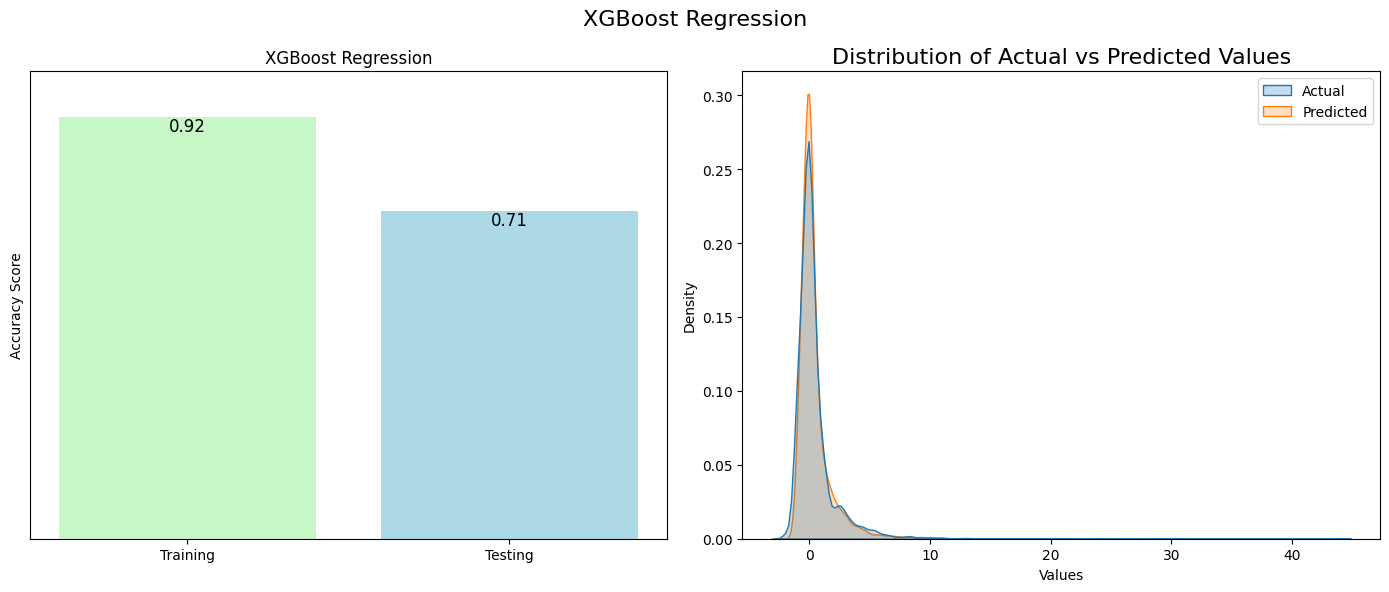

In [10]:
plt.figure(figsize=(14, 6))
plt.suptitle("XGBoost Regression", fontsize=16)

xgb_reg = XGBRegressor(n_estimators=best_params_xgb['n_estimators'], max_depth=best_params_xgb['max_depth'])
xgb_reg.fit(X_train,y_train)

# Calculate the accuracy scores for the training and test sets
xgb_train_score = xgb_reg.score(X_train, y_train)
xgb_test_score = xgb_reg.score(X_test, y_test)

# Model scores
scores = [xgb_train_score, xgb_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.subplot(1,2,1)
plt.bar(labels, scores, color=['#90EE9080', '#ADD8E6'])
plt.ylabel('Accuracy Score')
plt.title('XGBoost Regression')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

# Predict the target variable for the test data
y_pred = xgb_reg.predict(X_test)

# Combine the actual and predicted values into a DataFrame
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create the kde comparison plot
plt.subplot(1,2,2)
plt.title("Distribution of Actual vs Predicted Values", fontsize=16)
sns.kdeplot(data=predicted_df, fill=True)
plt.xlabel('Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Gradient Boosting Regression

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


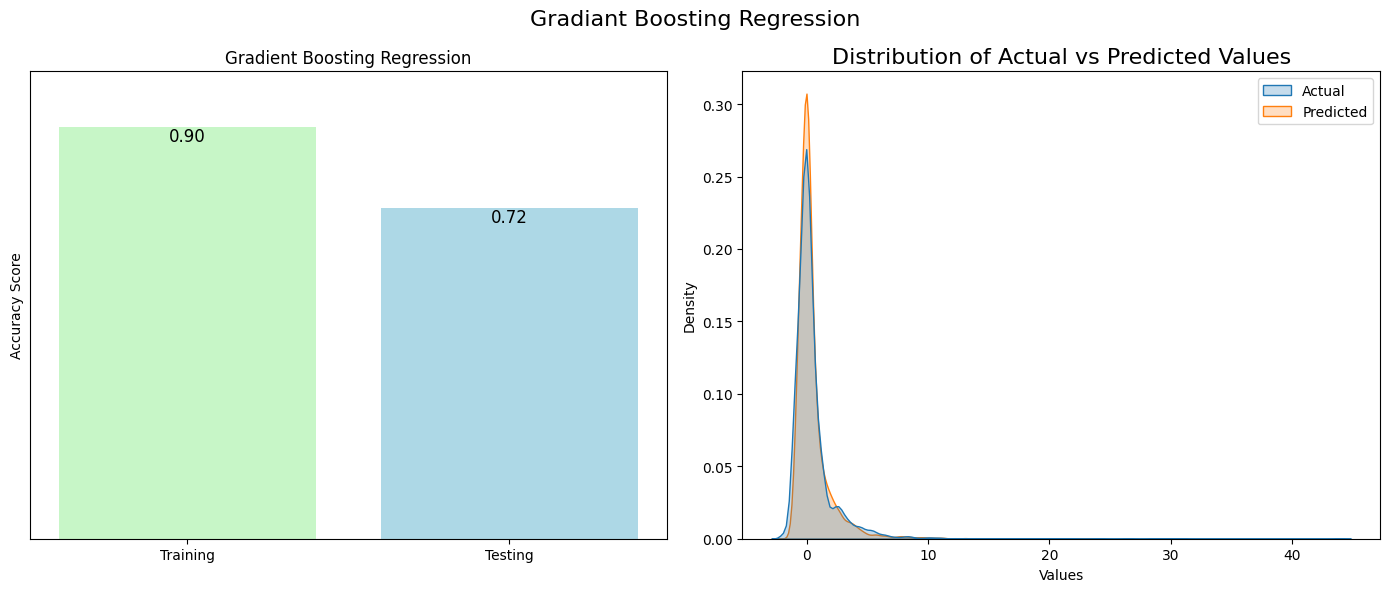

In [11]:
plt.figure(figsize=(14, 6))
plt.suptitle("Gradiant Boosting Regression", fontsize=16)

gb_reg = GradientBoostingRegressor(n_estimators=best_params_gb['n_estimators'], max_depth=best_params_gb['max_depth'])
gb_reg.fit(X_train,y_train)

# Calculate the accuracy scores for the training and test sets
gb_train_score = gb_reg.score(X_train, y_train)
gb_test_score = gb_reg.score(X_test, y_test)

# Model scores
scores = [gb_train_score, gb_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.subplot(1,2,1)
plt.bar(labels, scores, color=['#90EE9080', '#ADD8E6'])
plt.ylabel('Accuracy Score')
plt.title('Gradient Boosting Regression')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

# Predict the target variable for the test data
y_pred = gb_reg.predict(X_test)

# Combine the actual and predicted values into a DataFrame
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create the kde comparison plot
plt.subplot(1,2,2)
plt.title("Distribution of Actual vs Predicted Values", fontsize=16)
sns.kdeplot(data=predicted_df, fill=True)
plt.xlabel('Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Random Forest Regression

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


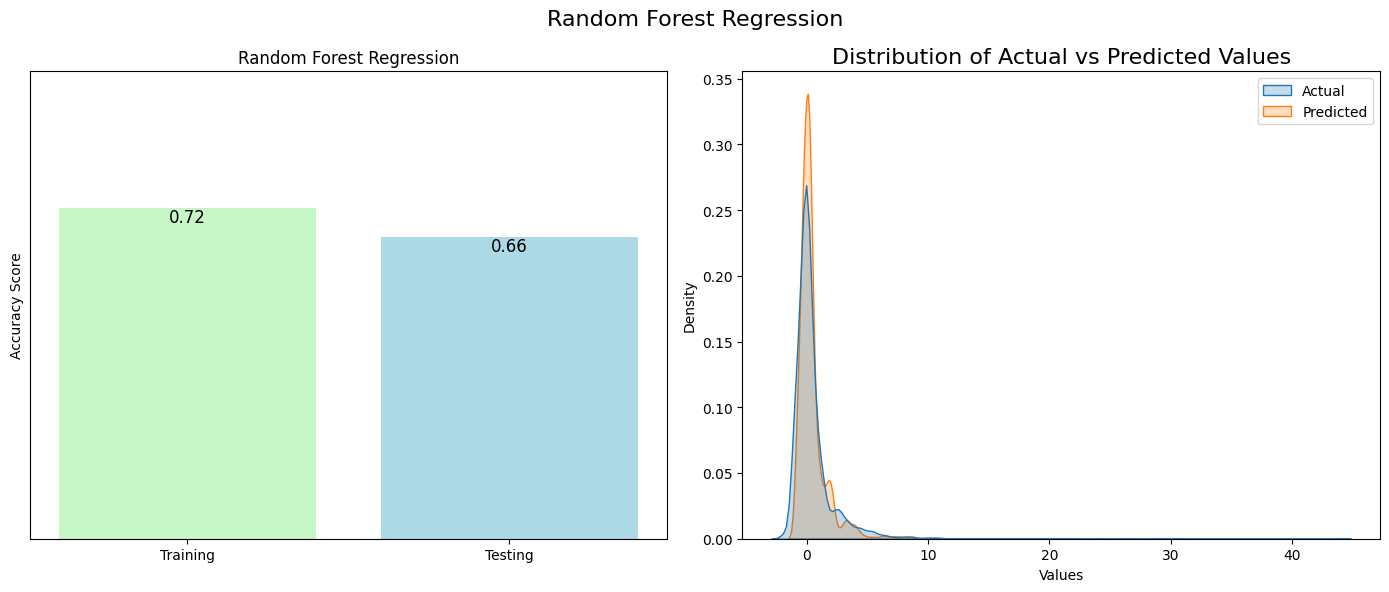

In [12]:
plt.figure(figsize=(14, 6))
plt.suptitle("Random Forest Regression", fontsize=16)

rf_reg = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], max_depth=best_params_rf['max_depth'])
rf_reg.fit(X_train,y_train)

# Calculate the accuracy scores for the training and test sets
rf_train_score = rf_reg.score(X_train, y_train)
rf_test_score = rf_reg.score(X_test, y_test)

# Model scores
scores = [rf_train_score, rf_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.subplot(1,2,1)
plt.bar(labels, scores, color=['#90EE9080', '#ADD8E6'])
plt.ylabel('Accuracy Score')
plt.title('Random Forest Regression')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

# Predict the target variable for the test data
y_pred = rf_reg.predict(X_test)

# Combine the actual and predicted values into a DataFrame
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create the kde comparison plot
plt.subplot(1,2,2)
plt.title("Distribution of Actual vs Predicted Values", fontsize=16)
sns.kdeplot(data=predicted_df, fill=True)
plt.xlabel('Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Evaluation Metrics - MSE, MAE, R2 & Explained Variance

## MEAN SQUARED ERROR (MSE)

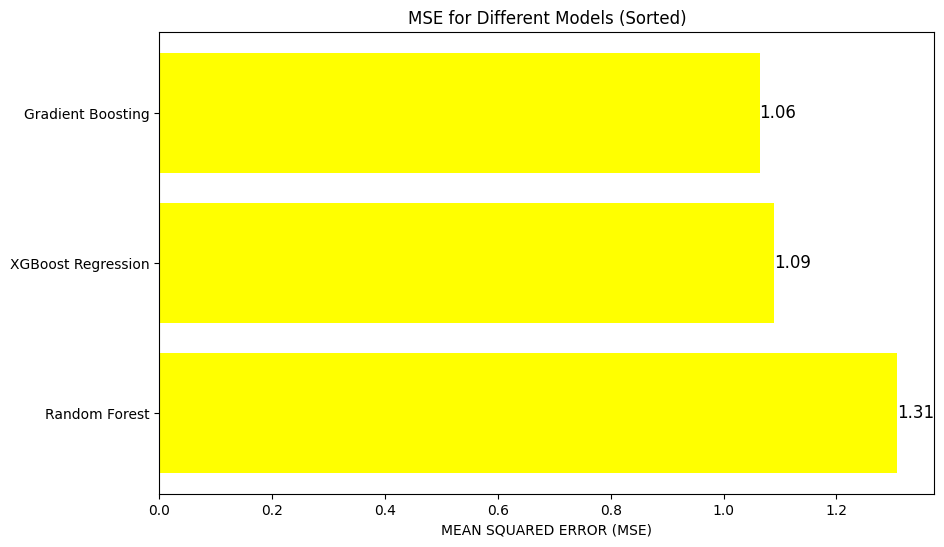

In [13]:
import numpy as np

mse_XGB = mean_squared_error(y_test, xgb_reg.predict(X_test))
mse_GB = mean_squared_error(y_test, gb_reg.predict(X_test))
mse_RF = mean_squared_error(y_test, rf_reg.predict(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['XGBoost Regression', mse_XGB],
    ['Gradient Boosting', mse_GB],
    ['Random Forest', mse_RF],

])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color= 'Yellow')
plt.xlabel('MEAN SQUARED ERROR (MSE)')
plt.title('MSE for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()


## MEAN ABSOLUTE ERROR (MAE)

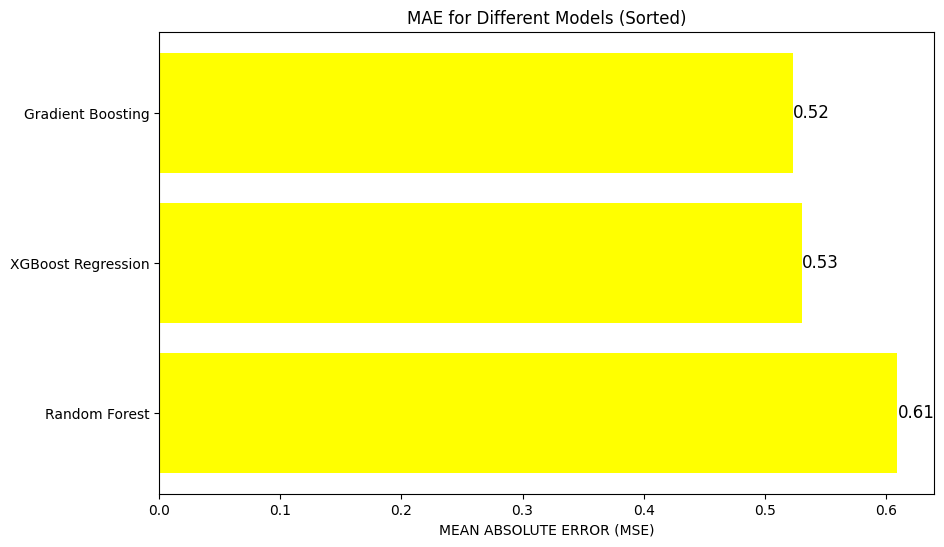

In [14]:
mae_XGB = mean_absolute_error(y_test, xgb_reg.predict(X_test))
mae_GB = mean_absolute_error(y_test, gb_reg.predict(X_test))
mae_RF = mean_absolute_error(y_test, rf_reg.predict(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['XGBoost Regression', mae_XGB],
    ['Gradient Boosting', mae_GB],
    ['Random Forest', mae_RF],

])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color= 'Yellow')
plt.xlabel('MEAN ABSOLUTE ERROR (MSE)')
plt.title('MAE for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()


## R-SQUARED (R2)

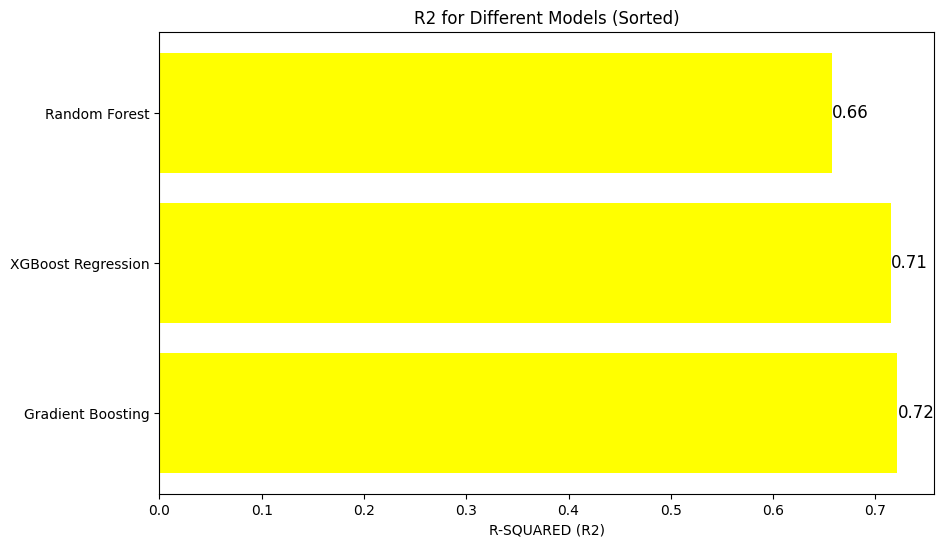

In [15]:
r2_XGB = r2_score(y_test, xgb_reg.predict(X_test))
r2_GB = r2_score(y_test, gb_reg.predict(X_test))
r2_RF = r2_score(y_test, rf_reg.predict(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['XGBoost Regression', r2_XGB],
    ['Gradient Boosting', r2_GB],
    ['Random Forest', r2_RF],

])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color= 'Yellow')
plt.xlabel('R-SQUARED (R2)')
plt.title('R2 for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()


## EXPLAINED VARIANCE

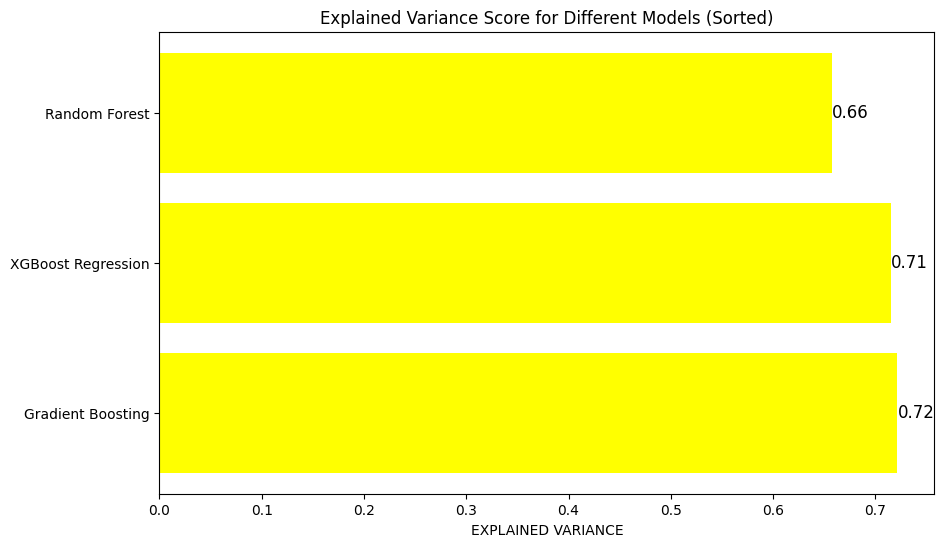

In [16]:
var_XGB = explained_variance_score(y_test, xgb_reg.predict(X_test))
var_GB = explained_variance_score(y_test, gb_reg.predict(X_test))
var_RF = explained_variance_score(y_test, rf_reg.predict(X_test))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['XGBoost Regression', var_XGB],
    ['Gradient Boosting', var_GB],
    ['Random Forest', var_RF],

])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color= 'Yellow')
plt.xlabel('EXPLAINED VARIANCE')
plt.title('Explained Variance Score for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()

### Findings:


<p>Upon comprehensive analysis of the evaluation metrics, it is evident that both the XGBoost and Gradient Boosting algorithms have demonstrated superior performance compared to the Random Forest model across multiple criteria.</p>

| Metric                   | XGBoost (XGB) | Gradient Boosting (GB) | Random Forest (RF) |
|--------------------------|---------------|-------------------------|--------------------|
| Mean Squared Error (MSE) | 1.09         | 1.07                   | 1.30              |
| Mean Absolute Error (MAE)| 0.53          | 0.52                    | 0.61               |
| R2 Score                  | 0.72          | 0.72                    | 0.66               |
| Explained Variance        | 0.71          | 0.72                    | 0.66               |

<p>Overall, based on the MSE and MAE (lower the better), R2 score, and Explained Variance (higher the better) -- XGBoost and Gradient Boosting models perform better compared to Random Forest. </p>

## Feature Importance

In [17]:
feature_names = X_train.columns

In [18]:
xgb_feature_importances = xgb_reg.feature_importances_
xgb_feature_importance_dict = dict(zip(feature_names,xgb_feature_importances))

print("XGB Feature Importance:")
print(dv)
for feature, importance in xgb_feature_importance_dict.items():
    print(f"{feature}: {importance}")

XGB Feature Importance:
--------------------------
Product Height (cm): 0.06194018945097923
Product Length (cm): 0.05243954434990883
Product Weight (g): 0.35881292819976807
Product Width (cm): 0.03764633461833
Price ($): 0.06164078041911125
Customer City: 0.0424068458378315
Customer State: 0.0959618091583252
Customer Zip Code Prefix: 0.28915151953697205


In [19]:
gb_feature_importances = gb_reg.feature_importances_
gb_feature_importances_dict = dict(zip(feature_names,gb_feature_importances))

print("GB Feature Importance:")
print(dv)
for feature, importance in gb_feature_importances_dict.items():
    print(f"{feature}: {importance}")

GB Feature Importance:
--------------------------
Product Height (cm): 0.046380712547274335
Product Length (cm): 0.028642635401308195
Product Weight (g): 0.3711447346262013
Product Width (cm): 0.023182182718943206
Price ($): 0.0767556613004436
Customer City: 0.02585184876478807
Customer State: 0.05764730257208947
Customer Zip Code Prefix: 0.3703949220689518


In [20]:
rf_feature_importances = rf_reg .feature_importances_
rf_feature_importance_dict = dict(zip(feature_names,rf_feature_importances))

print("RF Feature Importance:")
print(dv)
for feature, importance in rf_feature_importance_dict.items():
    print(f"{feature}: {importance}")

RF Feature Importance:
--------------------------
Product Height (cm): 0.007361860361552274
Product Length (cm): 0.006545047097419662
Product Weight (g): 0.45805064942546553
Product Width (cm): 0.003684756791354679
Price ($): 0.028313369809854775
Customer City: 0.006638597651407037
Customer State: 0.034964013886280704
Customer Zip Code Prefix: 0.45444170497666536
